## Pre-requsites

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from itertools import product, combinations
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

Points

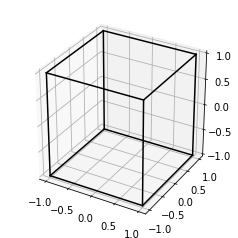

In [3]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_aspect("equal")

r = [-1, 1]
for s, e in combinations(np.array(list(product(r, r, r))), 2):
    if np.sum(np.abs(s-e)) == r[1]-r[0]:
        ax.plot3D(*zip(s, e), color="k")

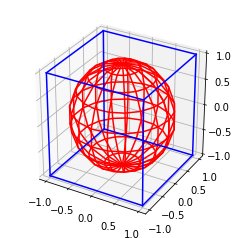

In [4]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_aspect("equal")

# draw cube
r = [-1, 1]
for s, e in combinations(np.array(list(product(r, r, r))), 2):
    if np.sum(np.abs(s-e)) == r[1]-r[0]:
        ax.plot3D(*zip(s, e), color="b")

# draw sphere
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
ax.plot_wireframe(x, y, z, color="r")

# draw a vector
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs
    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        FancyArrowPatch.draw(self, renderer)

In [5]:
def draw_connecting_line(ax,a,b,**kwargs):
    """
    Arguments
    ---------
    ax
    a
    b
    **kwargs
    """
    x0,y0,z0=a
    x1,y1,z1=b
    ax.plot([x0,x1],[y0,y1],[z0,z1],**kwargs)
    
def draw_vector(ax,a,b,**kwargs):
    """
    Arguments
    ---------
    ax
    a
    b
    **kwargs
    """
    x0,y0,z0=a
    x1,y1,z1=b

    a=Arrow3D([x0,x1],[y0,y1],[z0,z1],mutation_scale=20, arrowstyle='-|>',**kwargs)
    ax.add_artist(a)

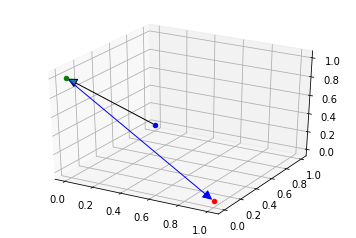

In [6]:
p1=[1,0,0] # red
p2=[0,1,0] # blue
p3=[0,0,1] # green

fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')

ax.scatter(*p1,color='red')
ax.scatter(*p2,color='blue')
ax.scatter(*p3,color='green')

draw_vector(ax,p2,p3)
draw_vector(ax,p3,p1,color='blue')

* Example from http://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html

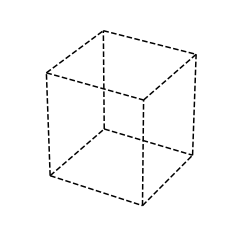

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')
ax._axis3don = False
radius=10

r = [0, radius*2]
for s, e in combinations(np.array(list(product(r, r, r))), 2):
    if np.sum(np.abs(s-e)) == r[1]-r[0]:
        ax.plot3D(*zip(s, e), color="k",ls='--')

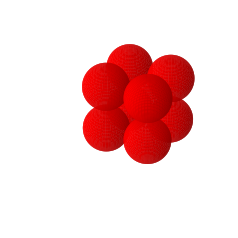

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')
ax._axis3don = False

# Make data
radius=10
nprob=100
u = np.linspace(0, 2 * np.pi, nprob)
v = np.linspace(0, np.pi, nprob)
x = radius * np.outer(np.cos(u), np.sin(v))
y = radius * np.outer(np.sin(u), np.sin(v))
z = radius * np.outer(np.ones(np.size(u)), np.cos(v))

# Plot the surface
ax.plot_surface(x, y, z, color='r')
ax.plot_surface(x+20, y, z, color='r')
ax.plot_surface(x+20, y+20, z, color='r')
ax.plot_surface(x, y+20, z, color='r')
ax.plot_surface(x, y, z+20, color='r')
ax.plot_surface(x+20, y, z+20, color='r')
ax.plot_surface(x+20, y+20, z+20, color='r')
ax.plot_surface(x, y+20, z+20, color='r')

ax.set_xlim(-20,30)
ax.set_ylim(-20,30)
ax.set_zlim(-20,30)
        
ax.set_aspect('equal')
plt.show()

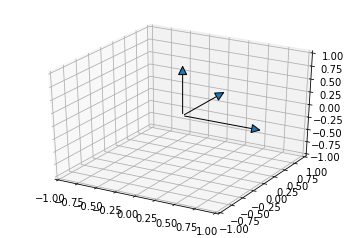

In [11]:
def draw_coord(r=1,**kwargs):
    fig=plt.figure()
    ax=fig.add_subplot(111,projection='3d')
    o=[0,0,0]
    
    x=np.array([1,0,0])
    y=np.array([0,1,0])
    z=np.array([0,0,1])
    x=x*r
    y=y*r
    z=z*r

    draw_vector(ax,o,x,**kwargs)
    draw_vector(ax,o,y,**kwargs)
    draw_vector(ax,o,z,**kwargs)

    ax.set_xlim(-1,1)
    ax.set_ylim(-1,1)
    ax.set_zlim(-1,1)

draw_coord(r=1.)